In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append("../")

from src.perform_database_operations import perform_database_operations
from src.utilis import top_n, visualize_top_handsets, visualize_distributions
from src.utilis import Preprocess

In [ ]:
config_file_path = '../config_database.json'
database_name = 'telecom'
sql_query = 'SELECT * FROM xdr_data'

df = perform_database_operations(config_file_path, database_name, sql_query)

In [ ]:
df.head()

In [ ]:
top_n(df, 'Handset Type', 10)

In [ ]:
top_n(df, "Handset Manufacturer", 3)

In [ ]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

choosen_manufacturer ='Huawei'
visualize_top_handsets(top_5_handsets_per_manufacturer, choosen_manufacturer)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
preprocessor = Preprocess(df)

In [ ]:
df = preprocessor.drop_columns_with_null(threshold=0.3)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
preprocessor.convert_to_datetime("Start")
preprocessor.convert_to_datetime("End")

In [ ]:
df.dtypes

In [ ]:
df = preprocessor.convert_to_float_to_int_if_possible()

In [16]:
df.select_dtypes('number').skew()

Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec 

In [19]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


In [33]:
cols = ['Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Netflix DL (Bytes)', 'Handset Type', 'Handset Type',]

KeyError: 0

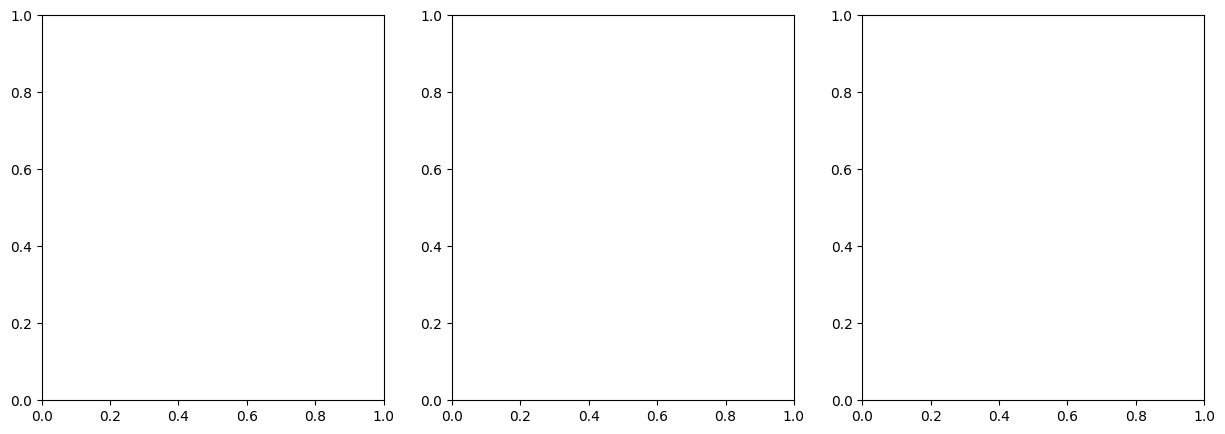

In [34]:
visualize_distributions(df, cols)